In [1]:
import pandas as pd
import numpy as np
import pickle

In [4]:
train_list = pickle.load(open('../../gen_data/x_train--features4.ipynb--.pickle','rb'))

In [6]:
t = train_list[1]

In [7]:
t.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_category_id',
       'sum_item_sales_back_1', 'sum_shop_sales_back_1',
       'item_cnt_month_back_1', 'sum_item_cat_sales_back_1',
       'sum_item_cat_shop_sales_back_1', 'sum_item_sales_back_2',
       'sum_shop_sales_back_2', 'item_cnt_month_back_2',
       'sum_item_cat_sales_back_2', 'sum_item_cat_shop_sales_back_2',
       'sum_item_sales_back_3', 'sum_shop_sales_back_3',
       'item_cnt_month_back_3', 'sum_item_cat_sales_back_3',
       'sum_item_cat_shop_sales_back_3', 'sum_item_sales_back_4',
       'sum_shop_sales_back_4', 'item_cnt_month_back_4',
       'sum_item_cat_sales_back_4', 'sum_item_cat_shop_sales_back_4',
       'sum_item_sales_back_5', 'sum_shop_sales_back_5',
       'item_cnt_month_back_5', 'sum_item_cat_sales_back_5',
       'sum_item_cat_shop_sales_back_5', 'sum_item_sales_back_6',
       'sum_shop_sales_back_6', 'item_cnt_month_back_6',
       'sum_item_cat_sales_back_6', 'sum_item_cat_shop_sales_back_6',


In [27]:
relevant_cols = ['date_block_num','shop_id','item_id','median_prevmonth_item_price','median_prevmonth_shop_item_price', 'prop_median_item_price','item_type']
t[~t.prop_median_item_price.isna()].sort_values('prop_median_item_price')[relevant_cols]

,date_block_num,shop_id,item_id,median_prevmonth_item_price,median_prevmonth_shop_item_price,prop_median_item_price,item_type
2229989,18,44,1856,2499.000,0.50,0.000200,Игры
2282879,18,52,1858,2499.000,0.50,0.000200,Игры
2137435,18,27,1856,2499.000,0.50,0.000200,Игры
2071327,18,15,1858,2499.000,0.50,0.000200,Игры
2071323,18,15,1851,2499.000,0.50,0.000200,Игры
2163877,18,31,1851,2499.000,0.50,0.000200,Игры
2097769,18,19,1856,2499.000,0.50,0.000200,Игры
2097771,18,19,1858,2499.000,0.50,0.000200,Игры
2249820,18,47,1851,2499.000,0.50,0.000200,Игры
2249822,18,47,1856,2499.000,0.50,0.000200,Игры


### many items with extreme prop_median_item_price are games or pc games

In [28]:
#investigating further
t[(t.prop_median_item_price>5) | (t.prop_median_item_price <0.2)][relevant_cols]

,date_block_num,shop_id,item_id,median_prevmonth_item_price,median_prevmonth_shop_item_price,prop_median_item_price,item_type
1235311,15,43,6497,999.000,53.000,0.053053,Игры PC
1419732,16,15,16447,199.000,999.000,5.020101,Кино
1446472,16,19,16447,199.000,999.000,5.020101,Кино
1470920,16,25,12748,199.000,999.000,5.020101,Кино
1520007,16,35,16447,199.000,999.000,5.020101,Кино
1560117,16,42,16447,199.000,999.000,5.020101,Кино
1571195,16,44,12748,199.000,999.000,5.020101,Кино
1618279,16,51,12398,799.000,95.000,0.118899,Кино
1620171,16,51,5327,599.000,95.000,0.158598,Кино
1652204,16,56,1286,199.000,999.000,5.020101,Кино


### these are the item types that have at least 1 entry of prop_median... >5 or <0.2

In [39]:
item_types_with_unreliable_pricing = t[(t.prop_median_item_price>5) | (t.prop_median_item_price <0.2)].item_type.unique()
#item_types_with_unreliable_pricing = ['Игры PC ', 'Кино ', 'Игры ', 'Подарки ', 'Служебные']

### translated

In [40]:
print(['PC games','Movie','Games','Presents','Service'])

['PC games', 'Movie', 'Games', 'Presents', 'Service']


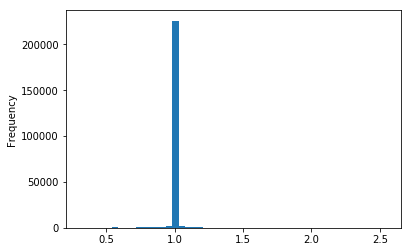

In [41]:
t[~t.item_type.isin(item_types_with_unreliable_pricing)].prop_median_item_price.plot(kind='hist',bins=50)

# previous stuff

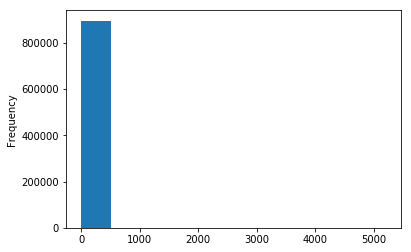

In [13]:
t.prop_median_item_price.plot(kind='hist')

In [11]:
#there are some items with wild "variance" in price, (not mathematical variance)
int_items = [1856,1858,1851,5241,5243]
t[t.item_id.isin(int_items)]['item_type'].unique()


array(['Игры '], dtype=object)

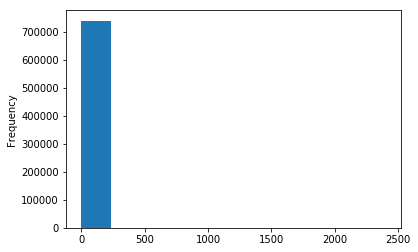

In [14]:
t[t.item_type!='Игры '].prop_median_item_price.plot(kind='hist')

In [16]:
t[t.item_type!='Игры '].sort_values('prop_median_item_price')[['date_block_num','shop_id','item_id','median_prevmonth_item_price','median_prevmonth_shop_item_price', 'prop_median_item_price']]

,date_block_num,shop_id,item_id,median_prevmonth_item_price,median_prevmonth_shop_item_price,prop_median_item_price
2310101,18,56,5235,1199.000,0.50,0.000417
2184492,18,37,5235,1199.000,0.50,0.000417
2257213,18,48,5235,1199.000,0.50,0.000417
2296216,18,54,5240,1199.000,0.50,0.000417
2405931,19,16,6457,699.000,0.50,0.000715
2355027,19,5,6457,699.000,0.50,0.000715
6073398,32,31,15336,249.000,0.99,0.003976
6139503,32,49,15336,249.000,0.99,0.003976
6175098,32,57,15336,249.000,0.99,0.003976
6304398,33,31,15336,124.995,0.99,0.007920
